In [36]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
#graphing functions
def plotGenotype_2D(graphInfo, title="Genotype Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["WPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["DPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["HPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def plotAllele_2D(graphInfo, title="Allele Generation Plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model_3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

In [38]:
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation(simData):
    w=simData['qW']
    d=simData['qD']
    fW=simData['fW']
    fD=simData['fD']
    h=simData['h']
    fH=fW*(1-h)+fD*h
    e=simData['e']
    #prevent redundant multiplication and create less rounding errors
    w2=w*w
    wd=w*d
    d2=d*d
    fBar=1-((1-fW)*w2+(1-fD)*(d2+2*wd*e)+(1-fH)*(2*wd*(1-e)))
    wPrime=(fW*w2+fH*(wd*(1-e)))
    dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))
    #wPrime=(fW*w2+fH*(wd*(1-e)))/fBar
    #dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))/fBar
    #print({'w':wPrime, 'd':dPrime,'fB':1-fBar})
    #print(wPrime+dPrime+(1-fBar))
    wPrime/=fBar
    dPrime/=fBar
    
    #remove rounding errors
    total=wPrime+dPrime
    if total!=1:
        wPrime/=total
        dPrime/=total
    
    
    homoW=(w2)
    homoD=(d2+2*wd*e)
    heterozygote=(2*wd*(1-e))
    return {'qW':wPrime,'qD':dPrime,'WW':homoW,'DD':homoD,'WD':heterozygote}

    
def run_simulation(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "WPlots": [simData['qW']], "DPlots": [simData['qD']], "HPlots": [0], "wPlots":[simData['qW']], "dPlots":[simData['qD']]}
    w=simData['qW']*simData['fW']
    d=simData['qD']*simData['fD']
    total=w+d
    simData['qW']=w/total
    simData['qD']=d/total
    for i in range(1,simData['generations']+1):
        update_vars(simData,run_generation(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['WPlots'].append(simData['WW'])
        graphInfo['DPlots'].append(simData['DD'])
        graphInfo['HPlots'].append(simData['WD'])
        if simData['qW']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plotGenotype_2D(graphInfo)
        plotAllele_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0

In [39]:
fWW=1
fDD=.8
fH=.9
WW=.999
DD=.001
DD=DD*fDD
total=WW+DD
WW/=total
DD/=total
w=WW
d=DD
print(w)
print(d)
simData={'qW':w,'qD':d,'fW':1,'fD':.8,'h':.5,'e':.9}
run_generation(simData)

0.9991998399679936
0.0008001600320064013


{'qW': 0.9987758504631423,
 'qD': 0.001224149536857648,
 'WW': 0.9984003201920639,
 'DD': 0.0014397758527500658,
 'WD': 0.0001599039551859161}

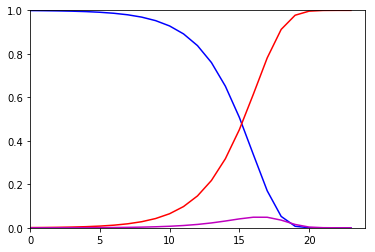

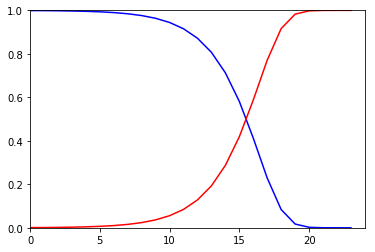

      DPlots    HPlots        WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  9.990000e-01  0.001000  0.999000       0
1   0.001440  0.000160  9.984003e-01  0.001224  0.998776       1
2   0.002202  0.000245  9.975532e-01  0.001873  0.998127       2
3   0.003368  0.000374  9.962581e-01  0.002865  0.997135       3
4   0.005150  0.000571  9.942787e-01  0.004382  0.995618       4
5   0.007872  0.000873  9.912555e-01  0.006701  0.993299       5
6   0.012026  0.001331  9.866423e-01  0.010246  0.989754       6
7   0.018359  0.002028  9.796125e-01  0.015661  0.984339       7
8   0.027993  0.003083  9.689236e-01  0.023923  0.976077       8
9   0.042604  0.004670  9.527257e-01  0.036513  0.963487       9
10  0.064657  0.007036  9.283071e-01  0.055651  0.944349      10
11  0.097693  0.010511  8.917959e-01  0.084627  0.915373      11
12  0.146599  0.015493  8.379078e-01  0.128209  0.871791      12
13  0.217626  0.022354  7.600198e-01  0.192992  0.807008      13
14  0.317588  0.031149  6

2.189938703094842

In [40]:
#ya fixed this by applying one round of fitness before simulation starts
#and by recording genotypes before fitness is applied
simData={'qW':.999,'qD':.001,'fW':1,'fD':.8,'h':.5,'e':.9,'generations':100}
run_simulation(simData,True,True)

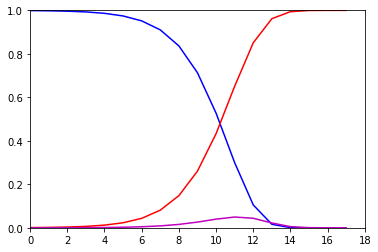

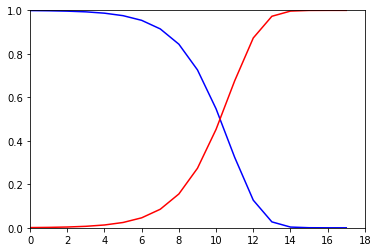

      DPlots    HPlots        WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  9.990000e-01  0.001000  0.999000       0
1   0.001799  0.000200  9.980010e-01  0.001899  0.998101       1
2   0.003415  0.000379  9.962054e-01  0.003605  0.996395       2
3   0.006479  0.000718  9.928029e-01  0.006838  0.993162       3
4   0.012271  0.001358  9.863710e-01  0.012950  0.987050       4
5   0.023176  0.002556  9.742679e-01  0.024454  0.975546       5
6   0.043539  0.004771  9.516902e-01  0.045924  0.954076       6
7   0.080976  0.008763  9.102606e-01  0.085358  0.914642       7
8   0.147815  0.015614  8.365703e-01  0.155623  0.844377       8
9   0.260746  0.026281  7.129733e-01  0.273886  0.726114       9
10  0.432984  0.039775  5.272411e-01  0.452872  0.547128      10
11  0.651095  0.049556  2.993495e-01  0.675873  0.324127      11
12  0.851128  0.043814  1.050586e-01  0.873035  0.126965      12
13  0.961711  0.022169  1.612022e-02  0.972795  0.027205      13
14  0.993967  0.005293  7

2.0305431848689306

In [41]:
simData={'qW':.999,'qD':.001,'fW':1,'fD':1,'e':.9,'h':.5,'generations':1000}
run_simulation(simData,True,True)

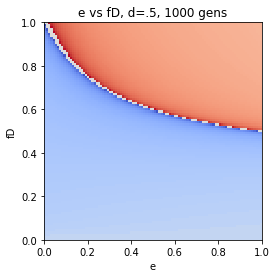

In [42]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'fW':1,'fD':yVals[yIndex],'e':xVals[xIndex],'h':.5,'generations':1000}
        takeover=run_simulation(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'e','fD','e vs fD, d=.5, 1000 gens')